In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [12]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Visualization

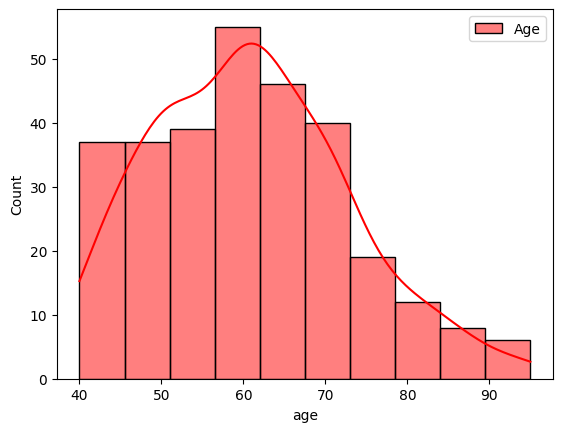

In [4]:
sns.histplot(data["age"],label="Age",color="red",kde=True)
plt.legend()

<AxesSubplot:xlabel='age', ylabel='Count'>

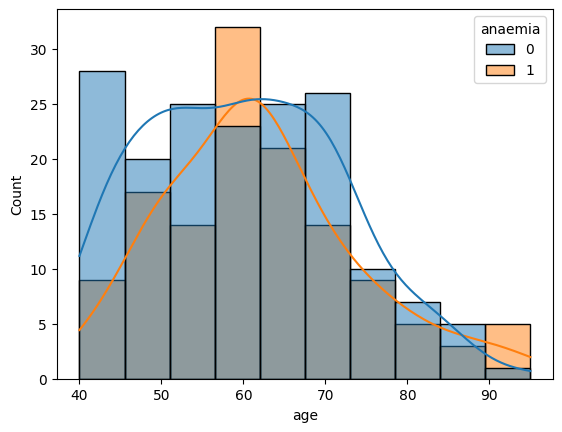

In [5]:
ax = plt.axes()
ax.set_facecolor("white")
sns.histplot(x="age",data=data,hue="anaemia",kde=True)

<AxesSubplot:xlabel='diabetes', ylabel='age'>

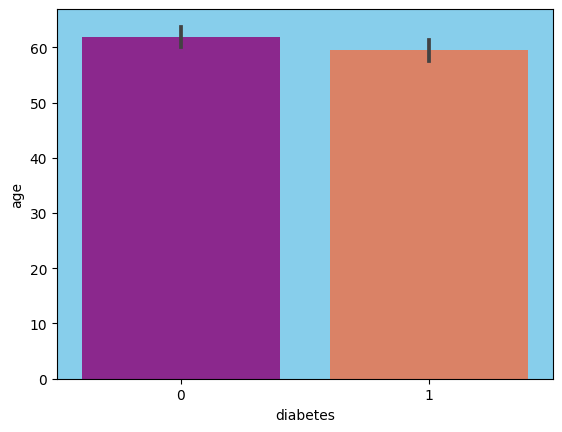

In [6]:
ax = plt.axes()
ax.set_facecolor("skyblue")
sns.barplot(x="diabetes",y="age",data=data,palette="plasma")

<AxesSubplot:xlabel='high_blood_pressure', ylabel='age'>

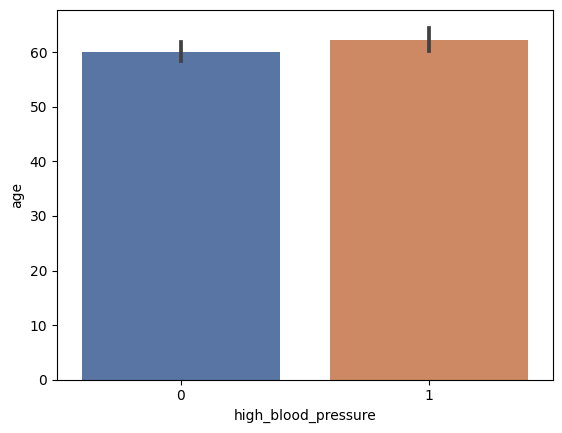

In [7]:
sns.barplot(x="high_blood_pressure",y="age",data=data,palette="deep")

C:\Users\Anmino\AppData\Local\Temp\ipykernel_21224\3143749131.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="platelets",y="age",data=data,shade=True,cmap='bwr_r',label="platelets")


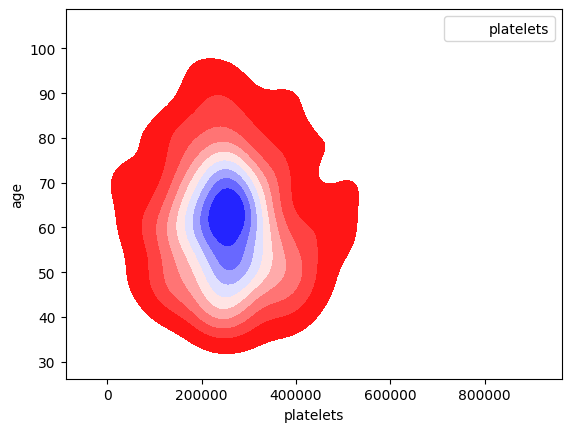

In [8]:
sns.kdeplot(x="platelets",y="age",data=data,shade=True,cmap='bwr_r',label="platelets")
plt.legend()
plt.show()

In [9]:
def gender(option):
    if option==0:
        return "Female"
    else:
        return "Male"
    
data["gender"] = data["sex"].apply(gender)

<AxesSubplot:xlabel='gender', ylabel='diabetes'>

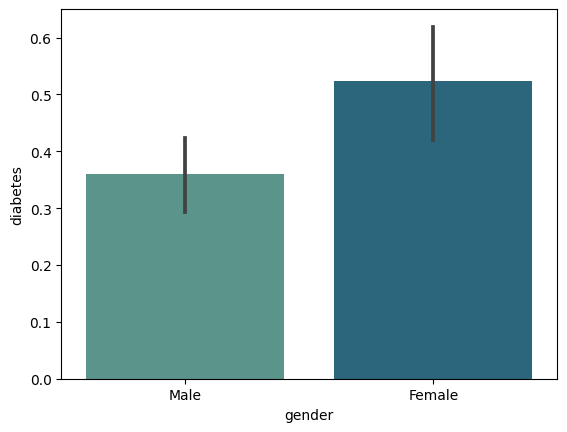

In [10]:
sns.barplot(x="gender",y="diabetes",data=data,palette="crest")

<AxesSubplot:xlabel='gender', ylabel='smoking'>

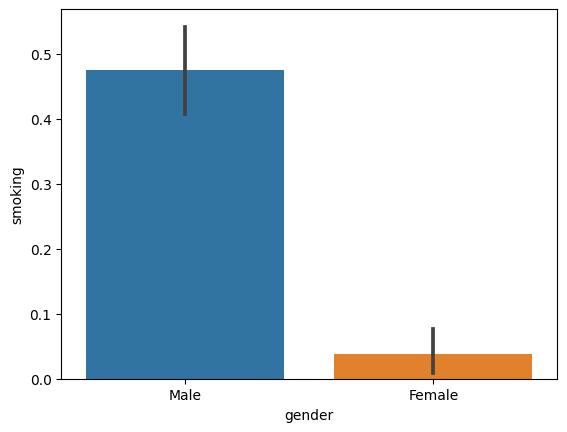

In [11]:
sns.barplot(x="gender",y="smoking",data=data)

<AxesSubplot:xlabel='gender', ylabel='age'>

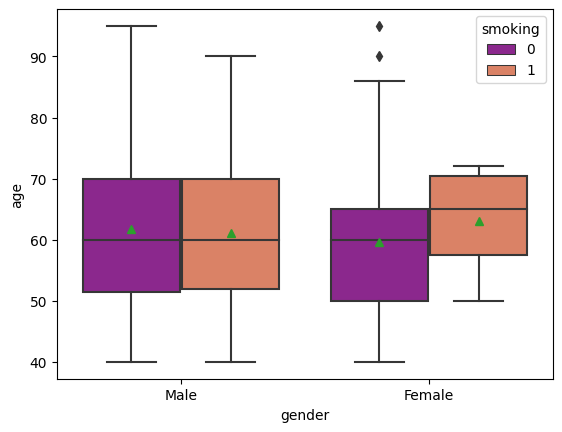

In [12]:
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x="gender",y="age",data=data,hue="smoking",color="r",showmeans=True,orient="v",palette="plasma")

<AxesSubplot:>

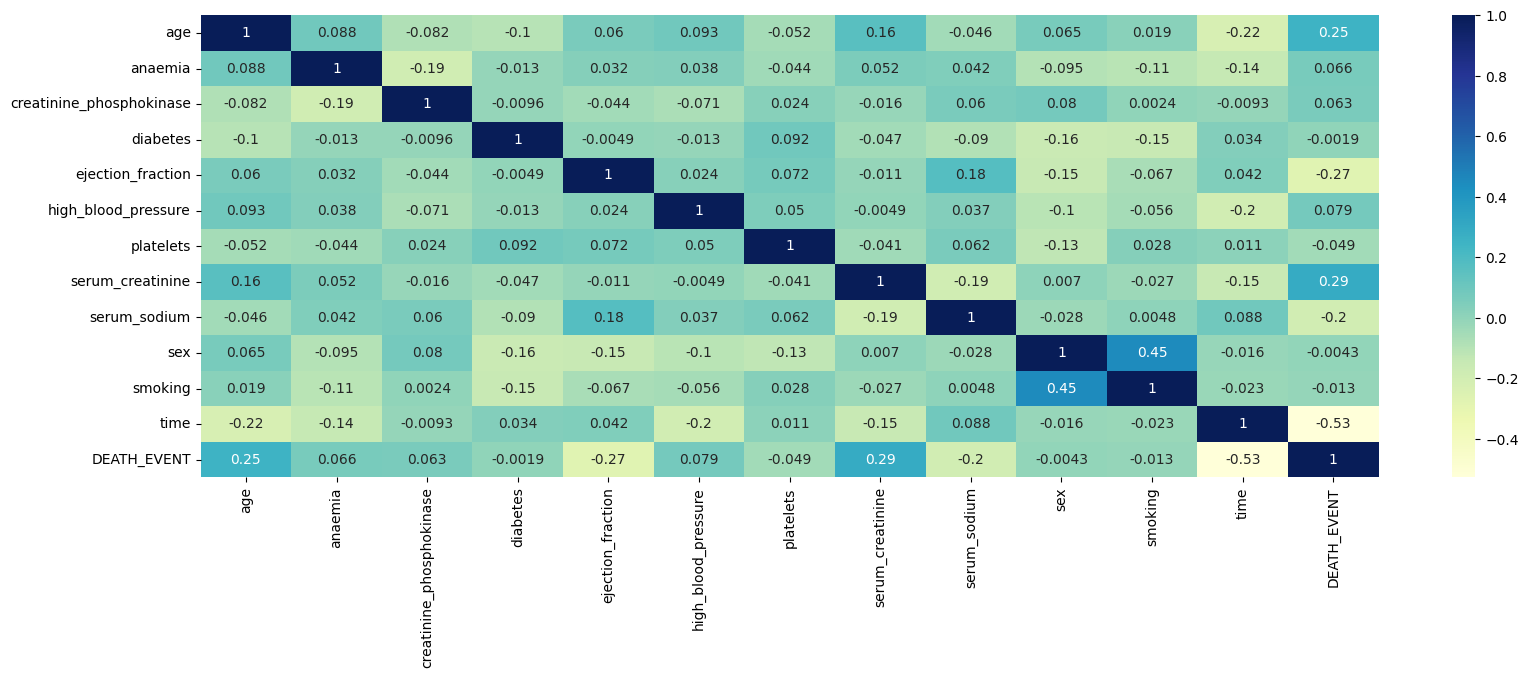

In [13]:
plt.figure(figsize=(19,6))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

# Train & Split Data 

In [14]:
data.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,gender
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male


In [15]:
x = data.drop(["gender","DEATH_EVENT"],axis=1)
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
pipeline = Pipeline([
            ("scale",StandardScaler()),
            ("model",LogisticRegression())
])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [17]:
print(f"Score : {pipeline.score(x_test,y_test)}%")

Score : 0.8%


In [18]:
print(f"{classification_report(y_test,pipeline.predict(x_test))}")

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



In [19]:
print(f"Accuracy_Score :{accuracy_score(y_test,pipeline.predict(x_test)):.2f}")
print(f"Precision :{precision_score(y_test,pipeline.predict(x_test)):.2f}%")
print(f"Recall_Score :{recall_score(y_test,pipeline.predict(x_test)):.2f}%")

Accuracy_Score :0.80
Precision :0.93%
Recall_Score :0.56%


# Prediction

In [20]:
pred_data = pd.DataFrame(pipeline.predict(x_test),y_test,columns=["pred_data"])
pred_data.head(10)

,pred_data
DEATH_EVENT,
0,0
0,0
1,0
1,1
0,0
0,0
1,1
0,0
1,1


In [21]:
joblib.dump(pipeline,'heart_failure_clinical_records_datase.pkl')

['heart_failure_clinical_records_datase.pkl']

In [9]:
a = 'Yes'
if a=='Yes':
    print(1)
else:
    print(0)

1
